Fetching space weather data from NOAA SWPC...
Data fetch complete!



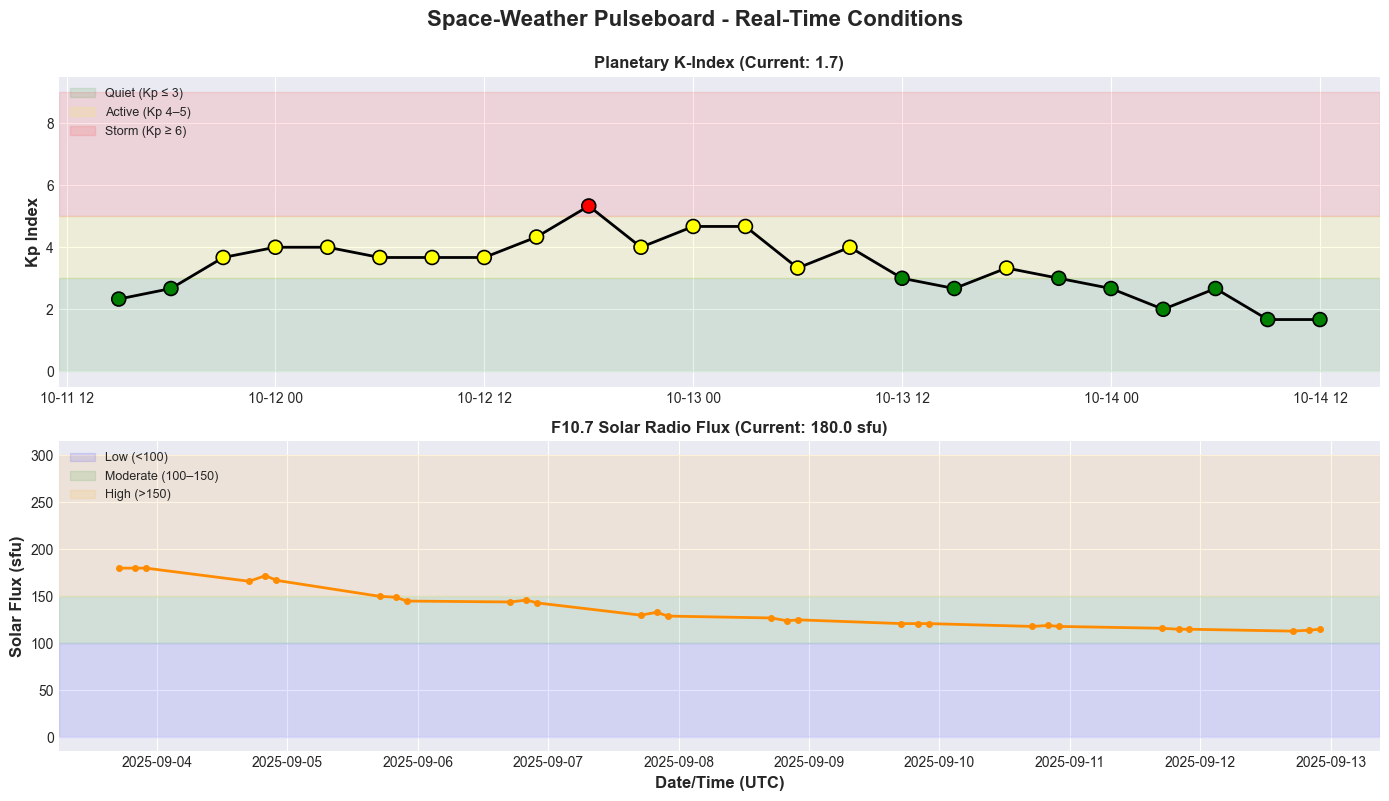


SPACE WEATHER IMPACT ANALYSIS

Timestamp: 2025-10-14 15:59:13 UTC

Current Conditions:
  • Kp Index: 1.7
  • F10.7 Flux: 180.0 sfu

--------------------------------------------------------------------------------
SATELLITE IMPACTS:
--------------------------------------------------------------------------------

1. Low atmospheric drag — satellites remain stable in orbit.

2. Nominal radiation conditions — normal satellite operations.

--------------------------------------------------------------------------------
GPS ACCURACY IMPACT:
--------------------------------------------------------------------------------

GPS accuracy within normal 3–5m range; minimal ionospheric disturbance.

--------------------------------------------------------------------------------
POWER GRID OPERATOR MITIGATION:
--------------------------------------------------------------------------------

NORMAL: Standard grid monitoring sufficient. Ideal for planned maintenance.


Data source: NOAA Space Weath

C:\Users\Anu jain\AppData\Local\Temp\ipykernel_18416\810309163.py:182: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  print(f"\nTimestamp: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')} UTC")


In [1]:
"""
Space-Weather Pulseboard (Simplified)
Fetches real-time Kp Index and F10.7 flux from NOAA SWPC, visualizes data,
and generates an AI-style analysis of current space-weather impacts.
"""

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# --- Configure Plot Style ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

# ----------------------------
# Data Fetch Functions
# ----------------------------

def fetch_kp_index():
    """Fetch Kp index from NOAA SWPC"""
    url = "https://services.swpc.noaa.gov/products/noaa-planetary-k-index.json"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        df['time_tag'] = pd.to_datetime(df['time_tag'])
        df['Kp'] = pd.to_numeric(df['Kp'], errors='coerce')
        return df.tail(24)  # Last 24 readings
    except Exception as e:
        print(f"Error fetching Kp index: {e}")
        return None


def fetch_f107_flux():
    """Fetch F10.7 solar flux from NOAA SWPC"""
    url = "https://services.swpc.noaa.gov/json/f107_cm_flux.json"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        df['time_tag'] = pd.to_datetime(df['time_tag'])
        df['flux'] = pd.to_numeric(df['flux'], errors='coerce')
        return df.tail(30)  # Last 30 days
    except Exception as e:
        print(f"Error fetching F10.7 flux: {e}")
        return None


def get_kp_color(kp_value):
    """Return color based on Kp index value"""
    if pd.isna(kp_value):
        return 'gray'
    elif kp_value <= 3:
        return 'green'
    elif kp_value <= 5:
        return 'yellow'
    else:
        return 'red'


# ----------------------------
# Analysis Function
# ----------------------------

def analyze_space_weather_impacts(kp_current):
    """Generate impact analysis based solely on Kp index"""
    impacts = {
        'satellite_impacts': [],
        'gps_impact': '',
        'grid_mitigation': ''
    }

    if kp_current >= 6:
        impacts['satellite_impacts'] = [
            "1. Significant atmospheric expansion increases drag on LEO satellites, requiring orbital adjustments.",
            "2. Higher radiation levels may trigger onboard electronics anomalies and single-event upsets."
        ]
        impacts['gps_impact'] = (
            "Severe ionospheric disturbances can cause large GPS errors (10–100m) and frequent signal disruptions."
        )
        impacts['grid_mitigation'] = (
            "CRITICAL: Activate GIC monitoring, reduce load on long transmission lines, and ensure standby capacity."
        )
    elif kp_current >= 4:
        impacts['satellite_impacts'] = [
            "1. Moderate drag increase affecting low Earth orbit satellites — monitor orbital decay rates.",
            "2. Slight increase in risk of single-event upsets in sensitive electronics."
        ]
        impacts['gps_impact'] = (
            "Moderate ionospheric irregularities may cause 5–15m GPS errors, especially near polar regions."
        )
        impacts['grid_mitigation'] = (
            "ELEVATED: Begin enhanced monitoring for geomagnetically induced currents at key substations."
        )
    else:
        impacts['satellite_impacts'] = [
            "1. Low atmospheric drag — satellites remain stable in orbit.",
            "2. Nominal radiation conditions — normal satellite operations."
        ]
        impacts['gps_impact'] = (
            "GPS accuracy within normal 3–5m range; minimal ionospheric disturbance."
        )
        impacts['grid_mitigation'] = (
            "NORMAL: Standard grid monitoring sufficient. Ideal for planned maintenance."
        )

    return impacts


# ----------------------------
# Fetch Data
# ----------------------------

print("Fetching space weather data from NOAA SWPC...")
kp_data = fetch_kp_index()
f107_data = fetch_f107_flux()
print("Data fetch complete!\n")

# ----------------------------
# Visualization
# ----------------------------

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Space-Weather Pulseboard - Real-Time Conditions',
             fontsize=16, fontweight='bold', y=0.995)

current_kp = None
current_f107 = None

# --- Plot 1: Kp Index ---
if kp_data is not None and not kp_data.empty:
    ax1 = axes[0]
    current_kp = kp_data['Kp'].iloc[-1]
    colors = [get_kp_color(kp) for kp in kp_data['Kp']]
    
    ax1.plot(kp_data['time_tag'], kp_data['Kp'], 'o-', color='black', linewidth=2, markersize=6)
    ax1.scatter(kp_data['time_tag'], kp_data['Kp'], c=colors, s=100, edgecolors='black', linewidth=1.2, zorder=5)
    
    ax1.axhspan(0, 3, alpha=0.1, color='green', label='Quiet (Kp ≤ 3)')
    ax1.axhspan(3, 5, alpha=0.1, color='yellow', label='Active (Kp 4–5)')
    ax1.axhspan(5, 9, alpha=0.1, color='red', label='Storm (Kp ≥ 6)')
    
    ax1.set_ylabel('Kp Index', fontsize=12, fontweight='bold')
    ax1.set_title(f'Planetary K-Index (Current: {current_kp:.1f})', fontsize=12, fontweight='bold')
    ax1.legend(loc='upper left', fontsize=9)
    ax1.set_ylim(-0.5, 9.5)
else:
    axes[0].text(0.5, 0.5, 'Kp Index data unavailable',
                 ha='center', va='center', fontsize=12)

# --- Plot 2: F10.7 Solar Flux ---
if f107_data is not None and not f107_data.empty:
    ax2 = axes[1]
    current_f107 = f107_data['flux'].iloc[-1]
    ax2.plot(f107_data['time_tag'], f107_data['flux'], color='darkorange', linewidth=2, marker='o', markersize=4)
    ax2.axhspan(0, 100, alpha=0.1, color='blue', label='Low (<100)')
    ax2.axhspan(100, 150, alpha=0.1, color='green', label='Moderate (100–150)')
    ax2.axhspan(150, 300, alpha=0.1, color='orange', label='High (>150)')
    
    ax2.set_ylabel('Solar Flux (sfu)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Date/Time (UTC)', fontsize=12, fontweight='bold')
    ax2.set_title(f'F10.7 Solar Radio Flux (Current: {current_f107:.1f} sfu)', fontsize=12, fontweight='bold')
    ax2.legend(loc='upper left', fontsize=9)
else:
    axes[1].text(0.5, 0.5, 'F10.7 flux data unavailable',
                 ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('space_weather_pulseboard.png', dpi=300, bbox_inches='tight')
plt.show()

# ----------------------------
# Impact Analysis
# ----------------------------

print("\n" + "="*80)
print("SPACE WEATHER IMPACT ANALYSIS")
print("="*80)
print(f"\nTimestamp: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')} UTC")

print(f"\nCurrent Conditions:")
print(f"  • Kp Index: {current_kp:.1f}" if current_kp else "  • Kp Index: N/A")
print(f"  • F10.7 Flux: {current_f107:.1f} sfu" if current_f107 else "  • F10.7 Flux: N/A")

if current_kp is not None:
    impacts = analyze_space_weather_impacts(current_kp)
    
    print("\n" + "-"*80)
    print("SATELLITE IMPACTS:")
    print("-"*80)
    for impact in impacts['satellite_impacts']:
        print(f"\n{impact}")
    
    print("\n" + "-"*80)
    print("GPS ACCURACY IMPACT:")
    print("-"*80)
    print(f"\n{impacts['gps_impact']}")
    
    print("\n" + "-"*80)
    print("POWER GRID OPERATOR MITIGATION:")
    print("-"*80)
    print(f"\n{impacts['grid_mitigation']}")
    
    print("\n" + "="*80)
    print("\nData source: NOAA Space Weather Prediction Center (SWPC)")
    print("For real-time alerts: https://www.swpc.noaa.gov/")
else:
    print("\nUnable to generate impact analysis – insufficient data")

print("\n✓ Visualization saved as 'space_weather_pulseboard.png'")
print("✓ Ready for PDF export via File → Download as PDF")
